In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import random
from sklearn.preprocessing import LabelEncoder , StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score,accuracy_score

In [ ]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data')

In [ ]:
dataset

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
X, y = dataset.iloc[:, :57].values, dataset.iloc[:, 57].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (X ,y ,test_size = 0.2 ,random_state = 0)

In [ ]:
model = Sequential()
model.add(Dropout(0.2, input_shape=(57,)))
model.add(Dense(units=10,
                activation='tanh'))
model.add(Dense(units=5,
                activation='tanh'))
model.add(Dense(units=1,
                activation='sigmoid',
                name='output'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=16)

Epoch 1/100
230/230 [==============================] - 3s 5ms/step - loss: 0.4927 - acc: 0.7682 - val_loss: 0.2859 - val_acc: 0.9120
Epoch 2/100
230/230 [==============================] - 1s 3ms/step - loss: 0.2841 - acc: 0.8957 - val_loss: 0.2154 - val_acc: 0.9337
Epoch 3/100
230/230 [==============================] - 1s 3ms/step - loss: 0.2438 - acc: 0.9136 - val_loss: 0.1970 - val_acc: 0.9348
Epoch 4/100
230/230 [==============================] - 1s 4ms/step - loss: 0.2295 - acc: 0.9166 - val_loss: 0.1864 - val_acc: 0.9348
Epoch 5/100
230/230 [==============================] - 1s 3ms/step - loss: 0.2249 - acc: 0.9196 - val_loss: 0.1816 - val_acc: 0.9380
Epoch 6/100
230/230 [==============================] - 1s 4ms/step - loss: 0.2185 - acc: 0.9212 - val_loss: 0.1795 - val_acc: 0.9348
Epoch 7/100
230/230 [==============================] - 1s 4ms/step - loss: 0.2108 - acc: 0.9226 - val_loss: 0.1737 - val_acc: 0.9380
Epoch 8/100
230/230 [==============================] - 1s 5ms/step - 

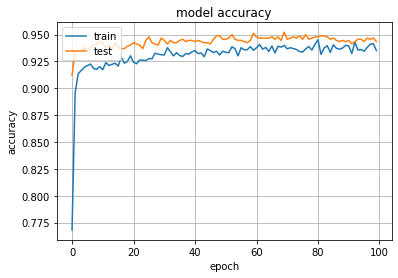

In [ ]:
from  matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()


In [ ]:
y_pred  = [1 if o>0.5 else 0 for o in model.predict(x_test)]

29/29 [==============================] - 0s 2ms/step


In [ ]:
cf_matrix =confusion_matrix(y_test, y_pred)
print(cf_matrix)
accuracy_score(y_test, y_pred)

[[510  28]
 [ 24 358]]


0.9434782608695652

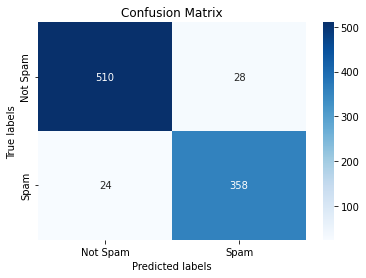

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt=''); #annot=True to annotate cells

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [ ]:
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))
print("F1 Score: {:.2f}%".format(100 * f1_score(y_test, y_pred)))

Precision: 92.75%
Recall: 93.72%
F1 Score: 93.23%


In [ ]:
f1_score(y_test, y_pred)

0.9322916666666667

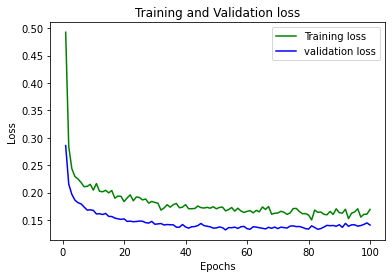

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()